In [1]:
from psi_phi import uv2psiphi
import numpy as np
import matplotlib.pyplot as plt

## Creating a velocity field

In [ ]:
LON,LAT = np.meshgrid(*[np.arange(-10,10,2)]*2)

p = 20
f = 5

Udiv = 2*LON/(LON**2 + LAT**2) 
Vdiv = 2*LAT/(LON**2 + LAT**2)

Urot = (-LAT/(LON**2 + LAT**2))*np.sqrt(LON**2 + LAT**2) 
Vrot = (LON/(LON**2 + LAT**2))*np.sqrt(LON**2 + LAT**2)

U = Udiv+Urot
V = Vdiv+Vrot

U[np.isnan(U)] = 0
V[np.isnan(V)] = 0

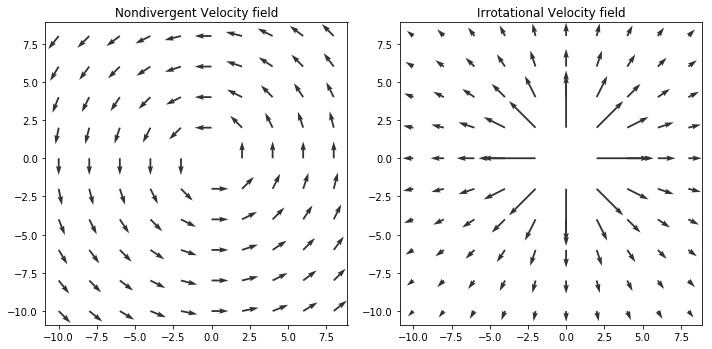

In [3]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].quiver(LON,LAT,Urot,Vrot,color='0.2')
ax[0].set_title('Nondivergent Velocity field')
ax[1].quiver(LON,LAT,Udiv,Vdiv,color='0.2')
ax[1].set_title('Irrotational Velocity field')
_ = [a.axis('scaled') for a in ax]
fig.tight_layout()

In [6]:
psi,upsi,vpsi,phi,uphi,vphi = uv2psiphi(LON,LAT,U,V)

       Optimization process
           Time for convergence: 0.00 min
           F(x): 195.29


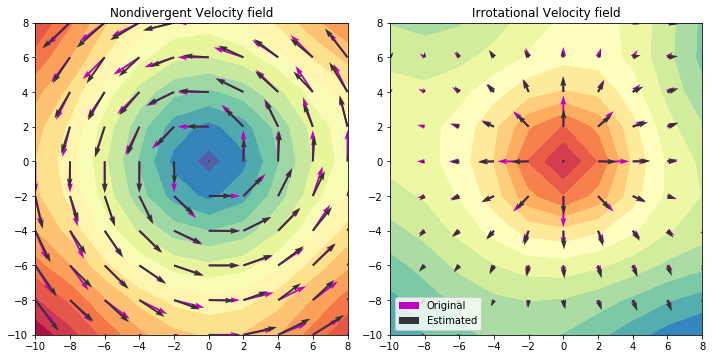

In [7]:
scl = 10

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].contourf(LON,LAT,psi,15,cmap='Spectral_r')
ax[0].quiver(LON,LAT,Urot,Vrot,color='m',scale=scl)
ax[0].quiver(LON,LAT,upsi,vpsi,color='0.2',scale=scl)
ax[0].set_title('Nondivergent Velocity field')
ax[1].contourf(LON,LAT,phi,15,cmap='Spectral_r')
ax[1].quiver(LON,LAT,Udiv,Vdiv,color='m',scale=scl,label='Original')
ax[1].quiver(LON,LAT,uphi,vphi,color='0.2',scale=scl,label='Estimated')
ax[1].set_title('Irrotational Velocity field')
_ = [a.axis('scaled') for a in ax]
fig.tight_layout()
ax[1].legend(loc=3)